## TensorFlow -- ReLU 

Example of working with ReLU's

See the following [Stackoverflow question](http://stackoverflow.com/q/36637901/904032)


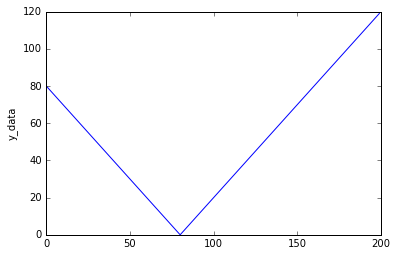

1.44285
1.27106
0.615451
0.450793
0.36677
0.308513
0.278102
0.227374
0.180334
0.174127
0.169646
0.165657
0.153642
0.124375
0.113502
0.109181
0.0951092
0.0718329
0.0702661
0.0691406
0.0582613
0.0499993
0.0463464
0.0389064
0.032653
0.0294845
0.024887
0.0240425
0.0212374
0.0204005
0.0170113
0.013549
0.0125203
0.01139
0.0100382
0.00866257
0.00766082
0.00615527
0.00606413
0.00545659
0.00474748
0.00416413
0.00399792
0.00385372
0.00327202
0.00231699
0.00227383
0.00156412
0.00155911
0.00102823
0.000129768
0.000125775
7.44752e-05


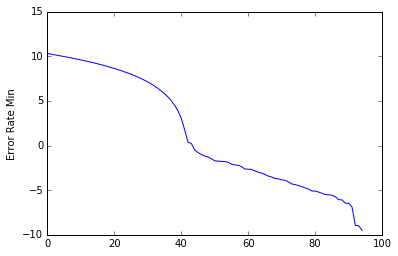

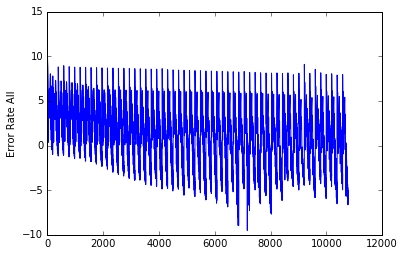



min_error: 7.44752e-05
should be: min_error: 7.44752e-05


In [41]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

my_random_seed=12345
np.random.seed(my_random_seed) # Make predictable
episodes = 55
batch_size = 5
hidden_units = 30
hidden_units = 100

learning_rate = 1e-3

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1, seed=my_random_seed)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


# Produce the data
x_data = np.arange(-100, 100).astype(np.float32)
y_data = np.abs(x_data + 20.)

# Plot it.
plt.plot(y_data)
plt.ylabel('y_data')
plt.show()

# Might want to randomize the data
# np.random.shuffle(x_data)
# y_data = np.abs(x_data + 20.)

# reshape data ...
x_data = x_data.reshape(200, 1)
y_data = y_data.reshape(200, 1)

# create placeholders to pass the data to the model
x = tf.placeholder('float', shape=[None, 1])
y_ = tf.placeholder('float', shape=[None, 1])

W1 = weight_variable([1, hidden_units])
b1 = bias_variable([hidden_units])
r1 = tf.nn.relu(tf.matmul(x, W1) + b1)


# Input of r1 into r2 
W2 = weight_variable([hidden_units, hidden_units])
b2 = bias_variable([1])
r2 = tf.nn.relu(tf.matmul(r1,W2)+b2) 

# Input of r2 into r3 

W3 = weight_variable([hidden_units, hidden_units])
b3 = bias_variable([1])
r3 = tf.nn.relu(tf.matmul(r1,W3)+b3) 

# Input of r3 into last ReLU (which is just y)
W4 = weight_variable([hidden_units, 1])
b4 = bias_variable([1])
y = tf.nn.relu(tf.matmul(r3,W4)+b4) 


# Add r1 to r2 -- won't be able to reduce the error.
#W2 = weight_variable([1, hidden_units])
#b2 = bias_variable([hidden_units])
#r2 = tf.nn.relu(tf.matmul(x, W2) + b2)
#y = tf.add(r1,r2)

mean_square_error = tf.reduce_sum(tf.square(y-y_))
training = tf.train.AdamOptimizer(learning_rate).minimize(mean_square_error)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

min_error = np.inf
error_array_min=[]
error_array_all=[]

for _ in range(episodes):
    # iterrate trough every row (with batch size of 1)
    for i in range(x_data.shape[0]-batch_size+1):
        _, error = sess.run([training, mean_square_error],  feed_dict={x: x_data[i:i+batch_size], y_:y_data[i:i+batch_size]})
        if error != 0:
            error_array_all.append(np.log(error))
        if error < min_error :
            min_error = error
            if error != 0:
                error_array_min.append(np.log(error))
            if min_error < 3:
                print(error)
        #print(error)
        #print(error, x_data[i:i+batch_size], y_data[i:i+batch_size])


# error = sess.run([training, mean_square_error],  feed_dict={x: x_data[i:i+batch_size], y_:y_data[i:i+batch_size]})
# if error != None:
#    print(error)

sess.close()


plt.plot(error_array)
plt.ylabel('Error Rate Min')
plt.show()

plt.plot(error_array_all)
plt.ylabel('Error Rate All')
plt.show()

print("\n\nmin_error:",min_error)
print("should be: min_error: 7.44752e-05")


